## Tiago Vargas Pereira de Oliveira

In [22]:
import numpy as np


# Converte matriz de incidência em de adjacência
def incidence_to_adjacency(incidence_matrix: np.ndarray) -> np.ndarray:
	adjacency_matrix = incidence_matrix @ incidence_matrix.T
	np.fill_diagonal(adjacency_matrix, 0)
	return adjacency_matrix


# Q5

**Detectar grafos eulerianos a partir da matriz de incidência (máximo de 6 vértices e 10 arestas).**

In [23]:
from scipy.sparse.csgraph import connected_components


def is_eulerian(incidence_matrix: list[list[int]]) -> bool:
	adjacency_matrix = incidence_to_adjacency(np.array(incidence_matrix))

	# Checando se todos os vértices de grau > 0 tão conectados
	# (senão não dá pra andar por todas as arestas)
	(num_components, _) = connected_components(adjacency_matrix)
	if num_components > 1:
		# É desconexo
		return False

	# Checando se todos os vértices têm grau par
	# (senão não dá pra fazer um ciclo)
	degrees = np.sum(adjacency_matrix, axis=1)
	for degree in degrees:
		if degree % 2 != 0:
			return False

	return True


$K_3$

In [24]:
m = [
	# a  b  c
	[ 0, 1, 1],  # A
	[ 1, 0, 1],  # B
	[ 1, 1, 0],  # C
]

is_eulerian(m)


True

Grafo de Königsberg

In [25]:
m = [
	# a  b  c  d  e  f  g
	[ 1, 1, 1, 0, 0, 0, 0],  # A
	[ 1, 0, 0, 1, 1, 0, 0],  # B
	[ 0, 1, 1, 1, 0, 1, 1],  # C
	[ 0, 0, 0, 0, 1, 1, 1],  # D
]

is_eulerian(m)


False

# Q6

**Detectar grafos hamiltonianos a partir da matriz de incidência (máximo de 6 vértices e 10 arestas).**

In [26]:
import itertools


def is_hamiltonian(incidence_matrix: list[list[int]]) -> bool:
	adjacency_matrix = incidence_to_adjacency(np.array(incidence_matrix))
	num_vertices = len(adjacency_matrix)
	vertices = list(range(num_vertices))

	# Testa todas a combinações de vértices
	# Primeiro, define uma ordem (permutação)
	# Um caminho existe se os vértices estiverem conectados com o próximo na lista
	# Ex.: [0, 4, 6, ..., 2]
	# 2 é vizinho de 0?
	# 0 é vizinho de 4?
	# 4 é vizinho de 6?
	# ...
	for permutation in itertools.permutations(vertices):
		cycle = list(permutation)
		# Checa se cada vértice é adjacente ao próximo na lista
		# Quando i = 0, compara o primeiro com o último
		if all(adjacency_matrix[cycle[i-1], cycle[i]] == 1 for i in range(num_vertices)):
			return True

	return False


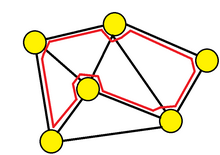

```
o --- o
|\   /| \
|  o  |  o
|/   \| /
o --- o
```

In [27]:
m = [
	# a  b  c  d  e  f  g  h  i  j
	[ 1, 1, 0, 1, 0, 0, 0, 0, 0, 0],  # A
	[ 1, 0, 1, 0, 0, 0, 1, 0, 1, 0],  # B
	[ 0, 1, 1, 0, 1, 1, 0, 0, 0, 0],  # C
	[ 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],  # D
	[ 0, 0, 0, 1, 1, 0, 0, 1, 0, 0],  # E
	[ 0, 0, 0, 0, 0, 1, 1, 1, 0, 1],  # F
]

is_hamiltonian(m)


True

```
o
| \
|  o --- o
| /
o
```

In [28]:
m = [
	# a  b  c  d
	[ 0, 1, 1, 1],  # A
	[ 1, 0, 1, 0],  # B
	[ 1, 1, 0, 0],  # C
	[ 0, 0, 0, 1],  # D
]

is_hamiltonian(m)


False